In [65]:
# importing Libraries
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets , transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , precision_score , recall_score , classification_report
import seaborn as sns
import time
from PIL import Image

In [14]:
# transform the Images to Tensors and some few Data Augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
])

In [15]:
# Download and load the training and testing datasets
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

In [16]:
# splitting the data 
BatchSize = 64
train = DataLoader(train_data , batch_size = BatchSize , shuffle = True)
test = DataLoader(test_data , batch_size = 1000 , shuffle = True)

image shape :  (64, 1, 28, 28)
labels in one batch : 64
labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


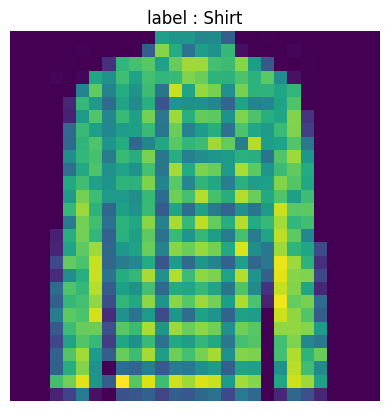

In [17]:
# images info
for img , lab in train:
    print("image shape : ", img.numpy().shape)
    print("labels in one batch :" , lab.size(0))
    print("labels :",lab.unique().tolist())
    break

# Class labels in Fashion MNIST
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
def show_image(index):
    npimg = img[index].numpy().transpose(1 ,2 ,0)
    plt.imshow(npimg)
    lb = lab[index].item()
    plt.title(f"label : {classes[lb]}")
    plt.axis("off")
    plt.show()

show_image(12)      

**Pictures look**

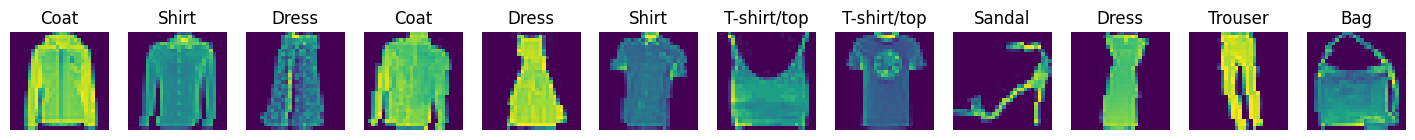

In [18]:
# images look
fig , axes = plt.subplots(1 , 12 , figsize=(18, 4))
for i in range(12):
    numpimg = img[i].numpy().transpose(1 ,2 , 0)
    axes[i].imshow(numpimg)
    lb = lab[i].item()
    axes[i].set_title(f"{classes[lb]}")
    axes[i].axis("off")

In [21]:
# Model Architecture 
class CNN(nn.Module):
    def __init__(self, nclasses):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1, stride=1)
        self.pool1 = nn.MaxPool2d(2)                          # 28x28 -> 14x14
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1)
        self.drop1 = nn.Dropout(0.3)
        self.pool2 = nn.MaxPool2d(2)                        

        self.dense1 = nn.Linear(7*7*128, 256)
        self.dense2 = nn.Linear(256, 128)
        self.dense3 = nn.Linear(128, 64)
        self.output = nn.Linear(64, nclasses)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.drop1(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.dense1(x))
        x = torch.relu(self.dense2(x))
        x = torch.relu(self.dense3(x))
        x = self.output(x)
        return x

In [23]:
# Model Setup: Loss Function & Optimizer
nclasses = len(lab.unique().tolist())
model = CNN(nclasses)
cost = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
losses = []
epochs = 20 

# Training the Model
for epoch in range(epochs):
    running_loss = 0
    model.train()
    start = time.time()
    
    for images, labels in train:  
        optimizer.zero_grad()
        predictions = model(images)
        loss = cost(predictions, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        losses.append(loss.item())
    
    end = time.time()
    epoch_loss = running_loss / len(train)
    print(f"{epoch+1}/{epochs} | loss: {epoch_loss:.4f} | time: {end - start:.2f}s")

1/20 | loss: 0.5513 | time: 111.54s
2/20 | loss: 0.3544 | time: 113.77s
3/20 | loss: 0.3088 | time: 113.54s
4/20 | loss: 0.2783 | time: 114.13s
5/20 | loss: 0.2549 | time: 113.61s
6/20 | loss: 0.2380 | time: 114.95s
7/20 | loss: 0.2244 | time: 114.64s
8/20 | loss: 0.2112 | time: 113.74s
9/20 | loss: 0.2027 | time: 113.77s
10/20 | loss: 0.1961 | time: 113.94s
11/20 | loss: 0.1890 | time: 112.97s
12/20 | loss: 0.1781 | time: 112.53s
13/20 | loss: 0.1739 | time: 115.20s
14/20 | loss: 0.1698 | time: 112.50s
15/20 | loss: 0.1628 | time: 112.75s
16/20 | loss: 0.1591 | time: 113.35s
17/20 | loss: 0.1531 | time: 112.82s
18/20 | loss: 0.1493 | time: 111.45s
19/20 | loss: 0.1460 | time: 113.34s
20/20 | loss: 0.1446 | time: 112.03s


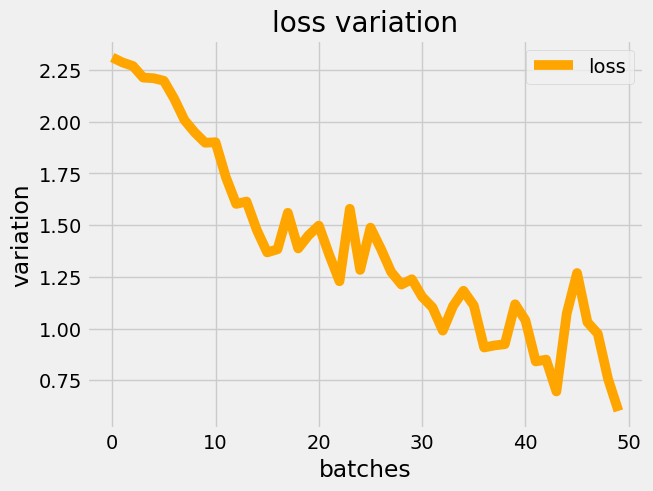

In [24]:
# Loss Variation
plt.style.use("fivethirtyeight")
plt.plot(range(50) , losses[:50], linewidth = 7, label = 'loss' , c= 'orange')
plt.xlabel('batches')
plt.ylabel("variation")
plt.title("loss variation")
plt.legend()
plt.show()

In [105]:
# Testing the Model
correct = 0
total = 0
predicted_values = []
true_values = []
all_images = []

with torch.no_grad():
    for im, labl in test :
        predict = model(im)
        ps = torch.argmax(predict , dim=1)
        correct += (ps == labl).sum().item()
        total += labl.size(0)
        predicted_values.extend(ps.tolist())
        true_values.extend(labl.tolist())
        all_images.extend(im)

print("correct predictions : ", correct , "out of ", total)
acc = correct / total
print(f"accuracy score : {acc*100:.2f}%")

correct predictions :  9208 out of  10000
accuracy score : 92.08%


[1, 2, 8, 5, 6, 6, 9, 7, 5, 2]
[1, 4, 8, 5, 6, 6, 9, 7, 5, 2]


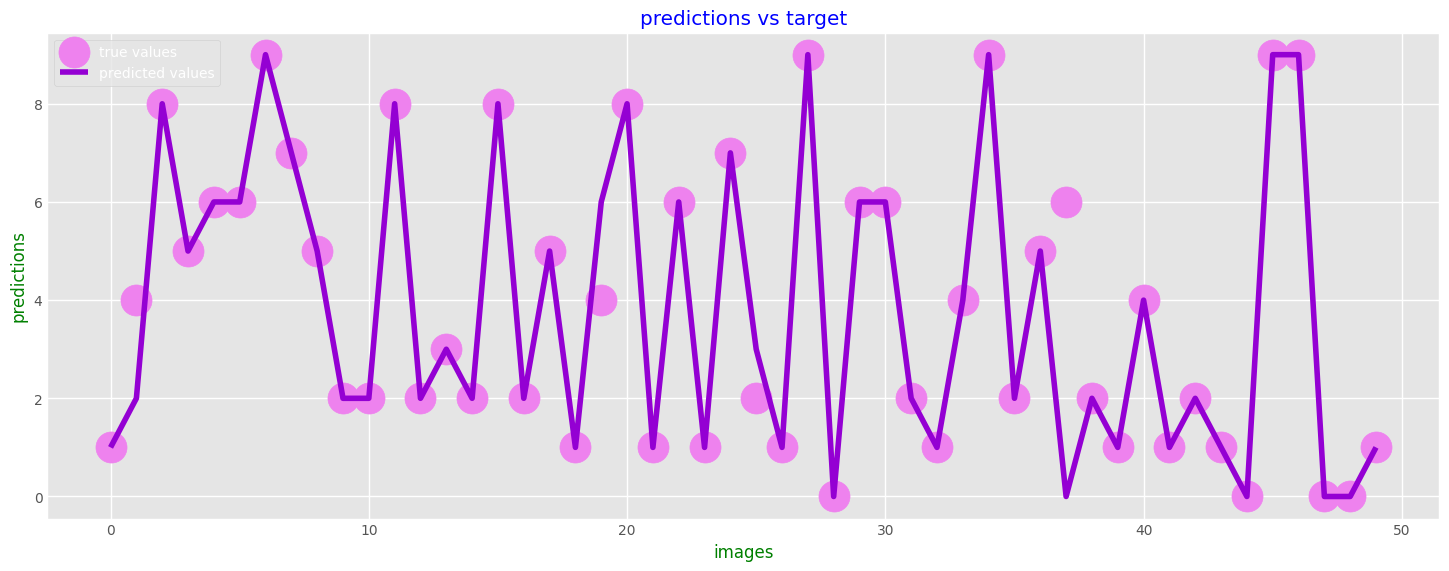

In [106]:
# print(predicted_values[:10])
# print(true_values[:10])
plt.figure(figsize= (16 , 6))
plt.scatter(range(50), true_values[:50] , label='true values', c='violet', s=500)
plt.plot(range(50) , predicted_values[:50] , label ='predicted values' , c='darkviolet' , linewidth=4)
plt.xlabel("images" , color='green')
plt.ylabel("predictions" , color='green')
plt.title("predictions vs target", color='blue')
plt.legend()
plt.show()

In [107]:
# metrics 
cm = confusion_matrix(true_values , predicted_values)
recall = recall_score(true_values , predicted_values , average = 'macro')
precision = precision_score(true_values , predicted_values, average = 'macro')
classifReport = classification_report(true_values , predicted_values)
print(f"recall score : {recall*100:.2f}%")
print(f"precision score : {precision*100:.2f}%")
print('confusion matrix : \n',cm)
print("classsication report : \n" , classifReport)

recall score : 92.08%
precision score : 92.08%
confusion matrix : 
 [[849   0   9  29   3   1 100   0   9   0]
 [  1 981   0  15   0   0   1   0   2   0]
 [ 18   0 898   4  45   0  34   0   1   0]
 [ 13   1  12 919  24   0  27   0   4   0]
 [  0   0  54  27 866   0  52   0   1   0]
 [  0   0   0   0   0 984   0  12   2   2]
 [ 77   0  48  20  58   0 786   0  11   0]
 [  0   0   0   0   0   9   0 975   0  16]
 [  1   1   2   2   0   4   0   0 988   2]
 [  0   0   0   0   0   5   1  32   0 962]]
classsication report : 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.90      0.89      1000
           3       0.90      0.92      0.91      1000
           4       0.87      0.87      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.79      0.79      1000
           7       0.96      0.97      0.97

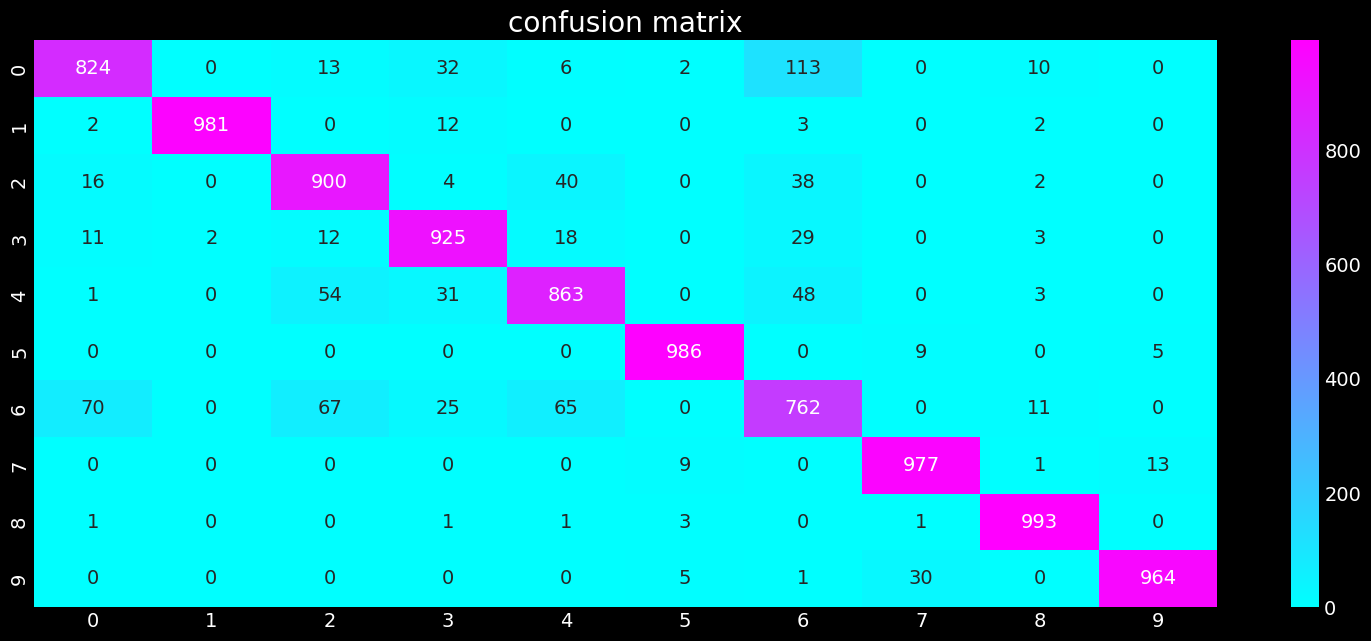

In [62]:
# confusion matrix visualization
plt.figure(figsize = (17 , 7))
plt.style.use("dark_background")
sns.heatmap(cm , annot=True ,fmt='d' , cmap='cool')
plt.title("confusion matrix")
plt.show()

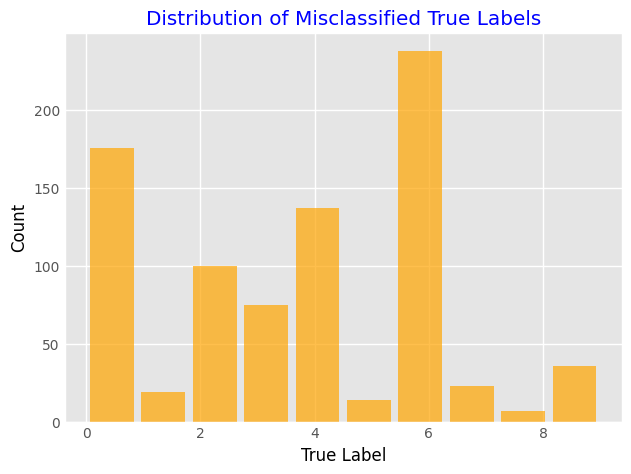

In [108]:
# classes that the model misclassified 
error = [true for true , pred in zip(true_values , predicted_values) if true != pred]
plt.style.use("ggplot")
plt.hist(error, bins=len(set(true_values)), color='orange', alpha=0.7, rwidth=0.85)
plt.xlabel("True Label" , color='black')
plt.ylabel("Count", color='black')
plt.title("Distribution of Misclassified True Labels" , color='b')
plt.show()

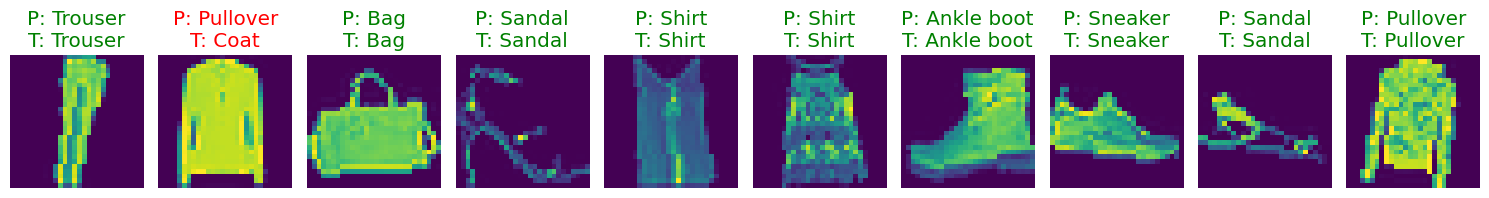

In [109]:
# Visualizing Predictions
plt.figure(figsize=(15, 7))

for i in range(10):
    npimg = all_images[i].numpy().transpose(1, 2, 0) 
    plt.subplot(1, 10, i+1)
    plt.imshow(npimg)
    color = "green" if predicted_values[i] == true_values[i] else "red"
    plt.title(f"P: {classes[predicted_values[i]]}\nT: {classes[true_values[i]]}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Predicting Custom Images
transf = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

def load_image(img_path):
    image = Image.open(img_path).convert('L')
    image = transf(image)
    image = image.unsqueeze(0)
    return image

# preparing images 
paths = ['/kaggle/input/clothes/Sandal.webp' ,'/kaggle/input/clothes/Trouser.webp' ]
images = [load_image(i) for i in paths]
real_classes = ['Sandal' , 'Trouser']

model.eval()
with torch.no_grad():
    right = 0
    for index , Img in enumerate(images):
        out = model(Img)
        preds = torch.argmax(out , dim=1)
        print(f"predictions : ", classes[preds.item()])
        print(f"True : " ,real_classes[index])
        if classes[preds.item()] == real_classes[index]:
           right +=1
        print("-"*25)
    print(f"model guessed {right} out of {len(images)}")  
# maybe because the images inputs aren't clear for the model to understand their shape form ):
# anyways... it's ok this is just a try not a serious effort, next time guys ! (:

predictions :  Bag
True :  Sandal
-------------------------
predictions :  Bag
True :  Trouser
-------------------------
model guessed 0 out of 2
